In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.drop('customerID', axis=1, inplace = True)

In [4]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

#for categorical columns

categorical = list(data.columns)

categorical.remove('tenure')
categorical.remove('MonthlyCharges')
categorical.remove('TotalCharges')
data.loc[data['tenure'] == 0, ['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,
753,0,20.25,
936,0,80.85,
1082,0,25.75,
1340,0,56.05,
3331,0,19.85,
3826,0,25.35,
4380,0,20.00,
5218,0,19.70,
6670,0,73.35,


In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#replace NaN values with 0
data['TotalCharges'].fillna(0, inplace=True)

<AxesSubplot:ylabel='Frequency'>

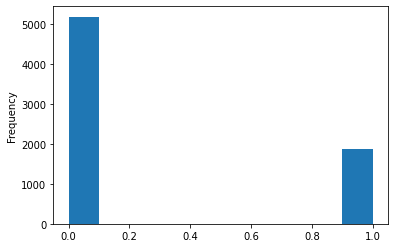

In [6]:
data['Churn'].str.replace('No', '0').str.replace('Yes', '1').astype(int).plot.hist()

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
data.iloc[0, data.columns.get_loc("TotalCharges")]

29.85

In [9]:
data.TotalCharges = data.TotalCharges.replace(" ",np.nan)

# drop missing values - side note: it represents only 11 out of 7043 rows which is not significant...
df = data.dropna()

# now we can convert the column type
df.TotalCharges = df.TotalCharges.astype('float')

df.shape

(7043, 20)

In [10]:
num_feat = df.select_dtypes(include=['float', 'int']).columns.tolist()
num_feat.remove('SeniorCitizen')    # SeniorCitizen is only a boolean
num_feat

['tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

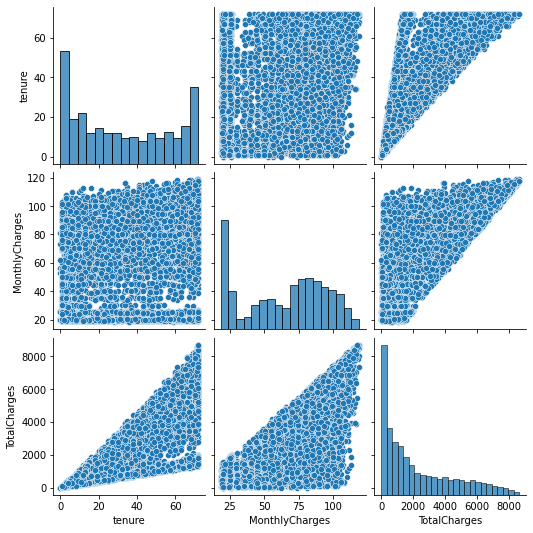

In [17]:
sns.pairplot(data=df[num_feat])
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
columns=['tenure','MonthlyCharges']
X_scaled=StandardScaler().fit_transform(data[columns])
data['tenure']=X_scaled[:,0]
data['MonthlyCharges']=X_scaled[:,1]
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,29.85,0
1,Male,0,No,No,0.066327,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,1889.50,0
2,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,108.15,1
3,Male,0,No,No,0.514251,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,1840.75,0
4,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,151.65,1


In [30]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [31]:
data['Churn'] = pd.factorize(data['Churn'])[0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


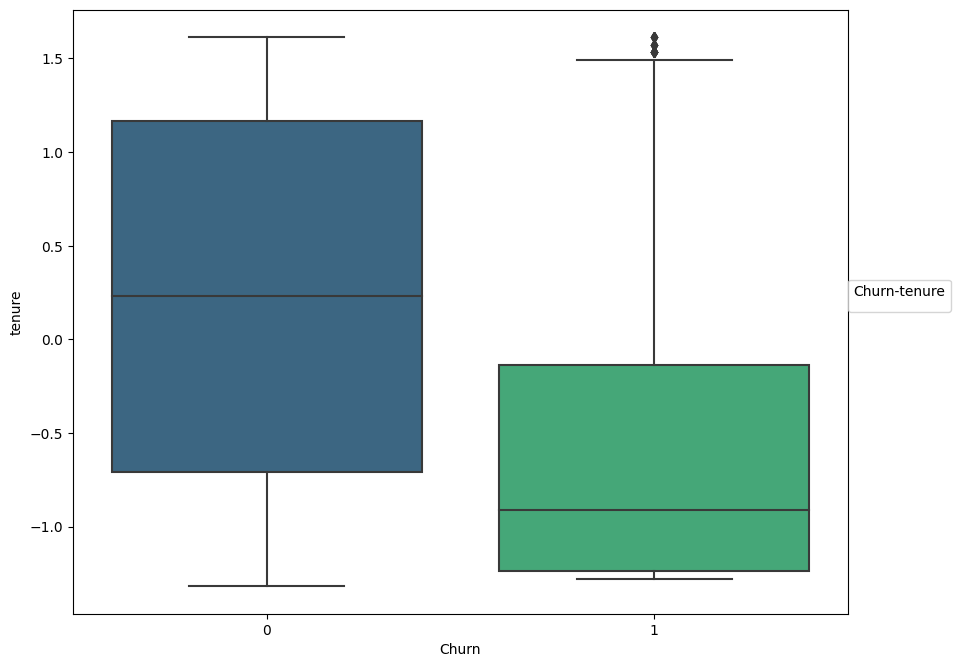

In [32]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=data,x='Churn',y='tenure',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn-tenure")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


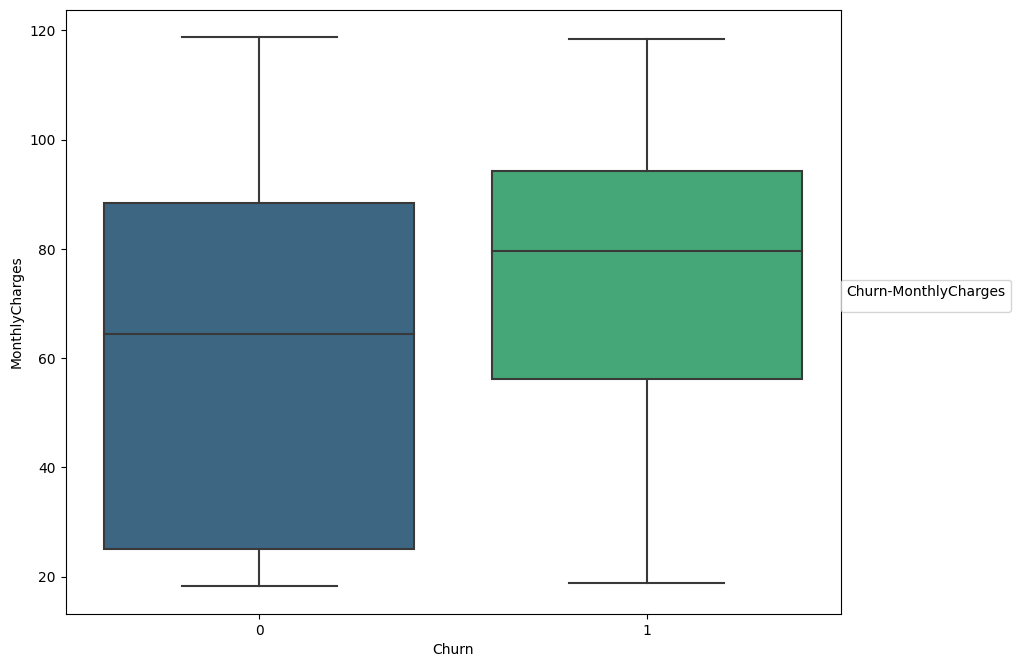

In [22]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=data,x='Churn',y='MonthlyCharges',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn-MonthlyCharges")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


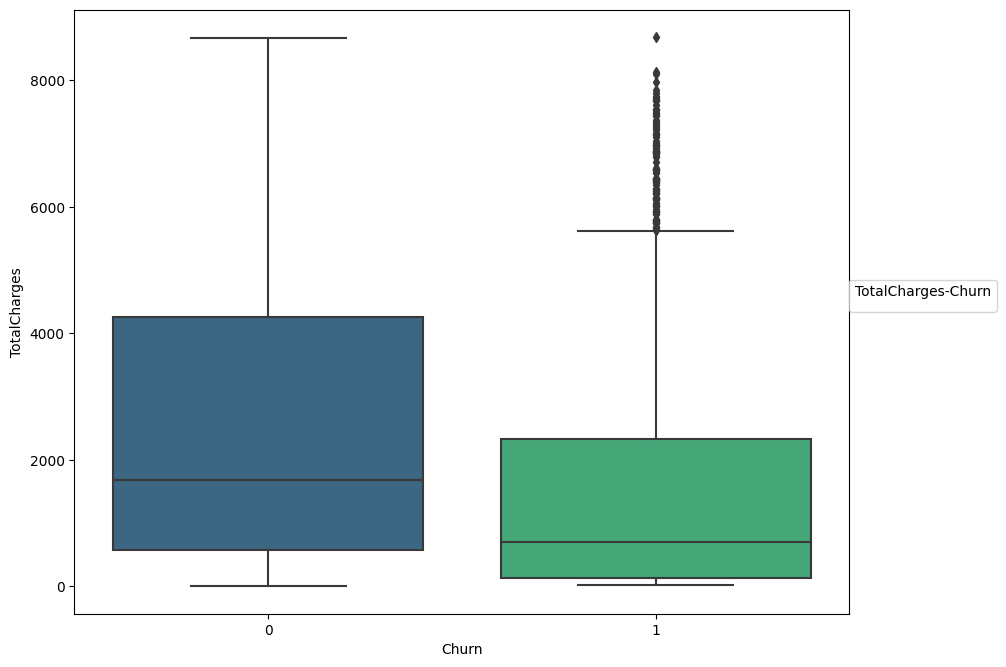

In [21]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=data,x='Churn',y='TotalCharges',palette='viridis')
plt.legend(loc=(1,0.5),title = "TotalCharges-Churn")

In [28]:
print("Highest allowed",data['Churn'].mean() + 3*data['Churn'].std())
#print("Lowest allowed",cust_final['Churn'].mean() - 3*cust_final['Churn'].std())
print("Lowest allowed",data['Churn'].mean() - 3*data['Churn'].std())

Highest allowed 1.5900537861595465
Lowest allowed -1.0593140445721545


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


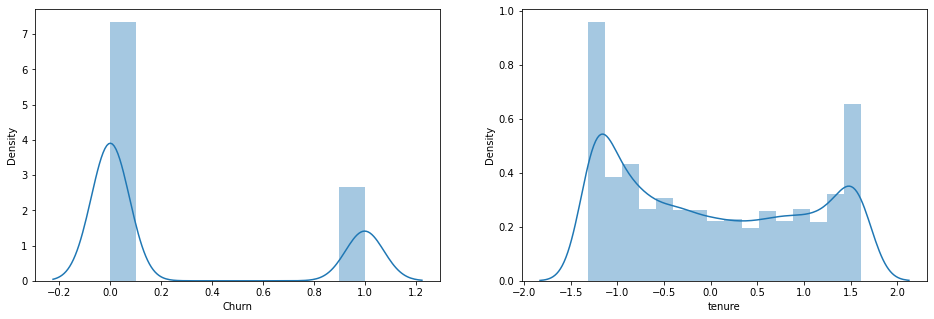

In [33]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Churn'])
plt.subplot(1,2,2)
sns.distplot(data['tenure'])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

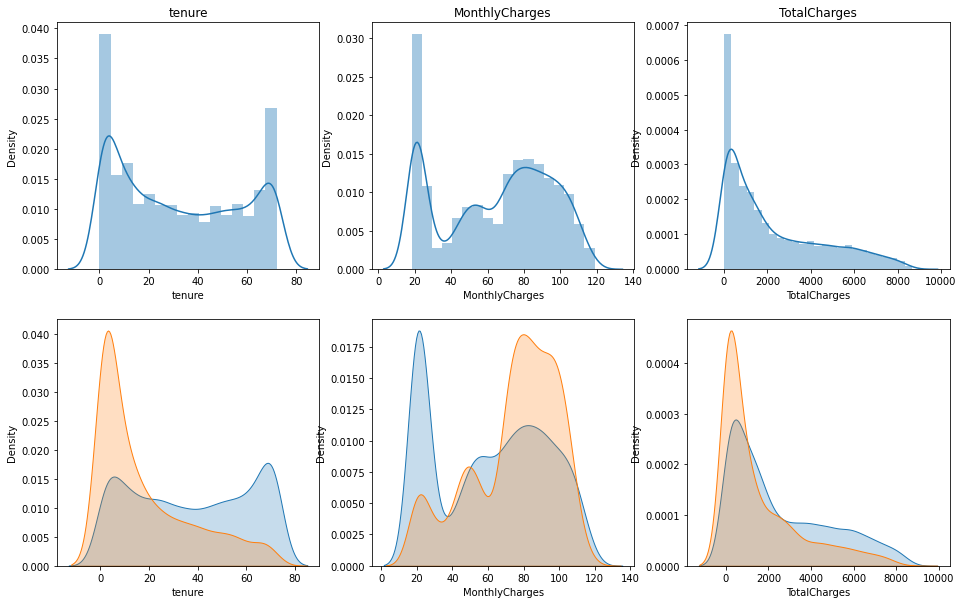

In [23]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.distplot(df['tenure'])
plt.title('tenure')

plt.subplot(2, 3, 2)
sns.distplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(2, 3, 3)
sns.distplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.subplot(2, 3, 4)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'tenure'], shade=True,label = 'Churn == 0')
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'tenure'], shade=True,label = 'Churn == 1')

plt.subplot(2, 3, 5)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'MonthlyCharges'], shade=True,label = 'Churn == 0')
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'], shade=True,label = 'Churn == 1')

plt.subplot(2, 3, 6)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'TotalCharges'], shade=True,label = 'Churn == 0')
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'TotalCharges'], shade=True,label = 'Churn == 1')